## $\chi$ между мономерами и ионами = 0, 0.5, chi с растворителем

# зум распределения

* плотности полимера
* концевых сегментов
* ионов в области осцилляции,  

наложив их друг на друга


In [6]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as AA

import matplotlib.cm as cm

from create_in import create_in
from out_reader import out_reader

In [7]:
# pow(10, -2) * 1.66

N = 600

S_namics = 50

alpha = 0.4

Cs = 0.0166

chi = 2.1

chi_ions = chi

In [8]:
file_name_pro = create_in(
        range_param = 'chi',
        min_val = 0,
        max_val = 2,
        Cs = Cs,
        chi_first_try = 0.5,
        chi_ions_first_try = 0.5,
        chi_surf_first_try = 0.5,
        N_layers_first_try = N - 250,
        N_first_try = N,

        S = S_namics,
        alpha = alpha,
        Kuhn = '1e-09',
        initial_cond = True,
        
        N_layers = N - 250,
        N = N,
        chi = chi,
        chi_ions = chi_ions,
        chi_surf = chi,
    )
psi, q, phi_brush, phi_end_brush, phi_Na, phi_Cl, phi_W = out_reader(alpha = alpha,file_names=file_name_pro)

No output defined! 
No output defined! 
Problem nr 1 out of 2
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.270883e+00 |g| = 6.014344e+00 alpha = 1.000000e+00 
hessian scaling: 1.5939
it =  1  E = 2.076942e+00 |g| = 5.534013e+00 alpha = 1.166269e-01 
it =  2  E = 2.616528e+00 |g| = 6.051954e+00 alpha = 7.599156e-02 
it =  3  E = 5.683266e+00 |g| = 5.610565e+00 alpha = 1.382791e-02 
it =  4  E = 2.417845e+01 |g| = 5.885334e+00 alpha = 8.485243e-04 
it =  5  E = 8.002411e+00 |g| = 5.825444e+00 alpha = 7.960393e-03 
hessian scaling: 2.8893
it =  6  E = 1.903982e+00 |g| = 5.111876e+00 alpha = 1.171661e-01 
it =  7  E = 1.546169e+00 |g| = 5.508598e+00 alpha = 1.852702e-01 
it =  8  E = 3.155602e+00 |g| = 5.708837e+00 alpha = 4.936551e-02 
it =  9  E = 2.280490e+01 |g| = 5.697523e+00 alph

# Наложение плотности полимера и ионов, и концов

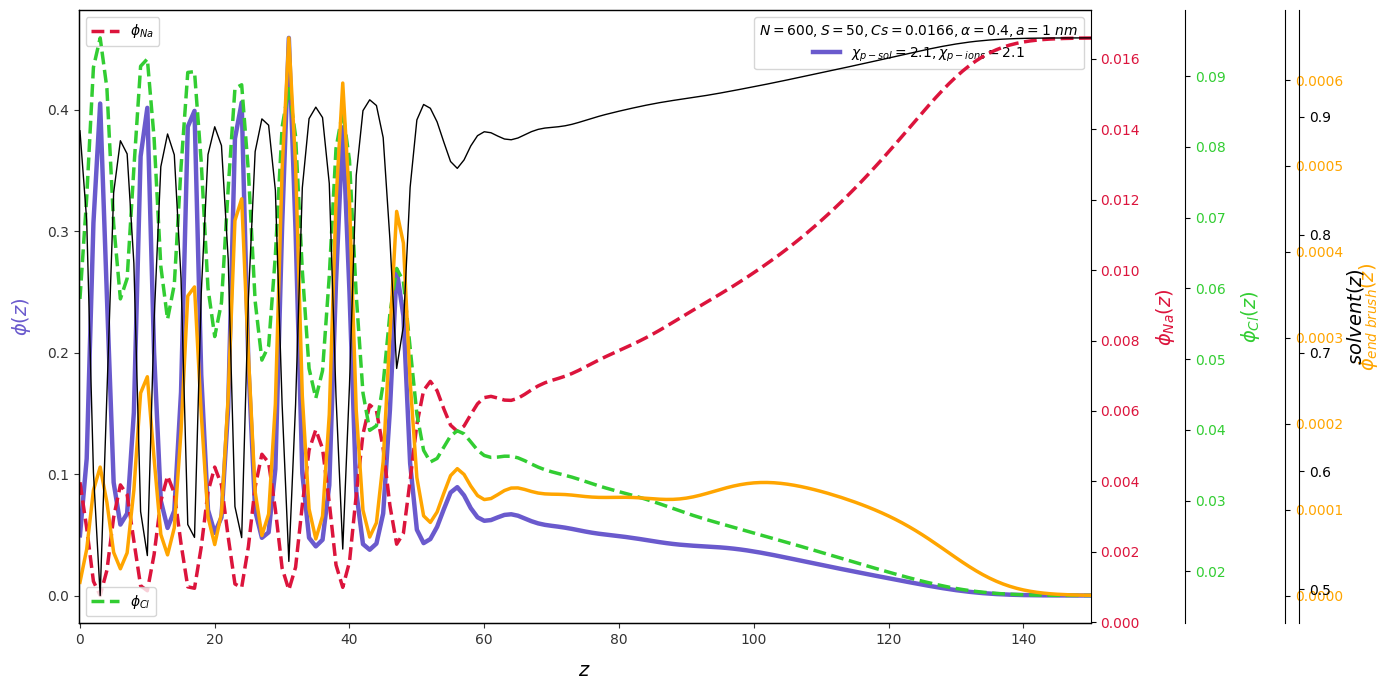

In [11]:
# Создаем фигуру
fig, ax1 = plt.subplots(figsize=(14, 7))  # Основная ось

# Первый график для phi_brush
ax1.plot(phi_brush, color='slateblue', label=f'$\\chi_{{p-sol}} = {chi}, \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, linestyle="-")
ax1.set_xlabel("$z$", fontsize=14, labelpad=10)
ax1.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10, color='slateblue')
ax1.tick_params(axis='y', labelcolor='slateblue')
ax1.set_xlim(-0.2, 150)

# Убираем верхнюю и правую границы
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_color("#333333")
ax1.spines["bottom"].set_color("#333333")
ax1.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Вторая ось y для phi_Na
ax2 = ax1.twinx()  # Вторая ось
ax2.plot(phi_Na, color='crimson', label='$\\phi_{Na}$', linewidth=2.5, linestyle="--")
ax2.set_ylabel("$\\phi_{Na}(z)$", fontsize=14, labelpad=10, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')



# Третья ось y для phi_Cl
# Добавляем сдвиг для третьей оси
ax3 = ax1.twinx()  
ax3.spines["right"].set_position(("outward", 68))  # Сдвигаем третью ось на 50 пикселей вправо
ax3.plot(phi_Cl, color='limegreen', label='$\\phi_{Cl}$', linewidth=2.5, linestyle="--")
ax3.set_ylabel("$\\phi_{Cl}(z)$", fontsize=14, labelpad=10, color='limegreen')
ax3.tick_params(axis='y', labelcolor='limegreen')


# Четвертая ось y для концов
# Добавляем сдвиг для четвертой оси
ax4 = ax1.twinx()  
ax4.spines["right"].set_position(("outward", 140))  # Сдвигаем третью ось на 50 пикселей вправо
ax4.plot(phi_end_brush, color='orange', label='$\\phi_{end \\ brush}$', linewidth=2.5, linestyle="-")
ax4.set_ylabel("$\\phi_{end \\ brush}(z)$", fontsize=14, labelpad=10, color='orange')
ax4.tick_params(axis='y', labelcolor='orange')

# Пятая ось y для растворителя
# Добавляем сдвиг для пятой оси
ax5 = ax1.twinx()  
ax5.spines["right"].set_position(("outward", 150))  # Сдвигаем третью ось на 50 пикселей вправо
ax5.plot(phi_W, color='black', label='$solvent$', linewidth=1, linestyle="-")
ax5.set_ylabel("$solvent(z)$", fontsize=14, labelpad=10, color='black')
ax5.tick_params(axis='y', labelcolor='black')


# Легенда для первого графика
ax1.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
           title_fontsize=10, loc="upper right")

# Легенда для второго графика
ax2.legend(fontsize=10, loc="upper left")

# Легенда для третьего графика
ax3.legend(fontsize=10, loc="lower left")

# # Легенда для четвертого графика
# ax4.legend(fontsize=10, loc="lower right")


# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()


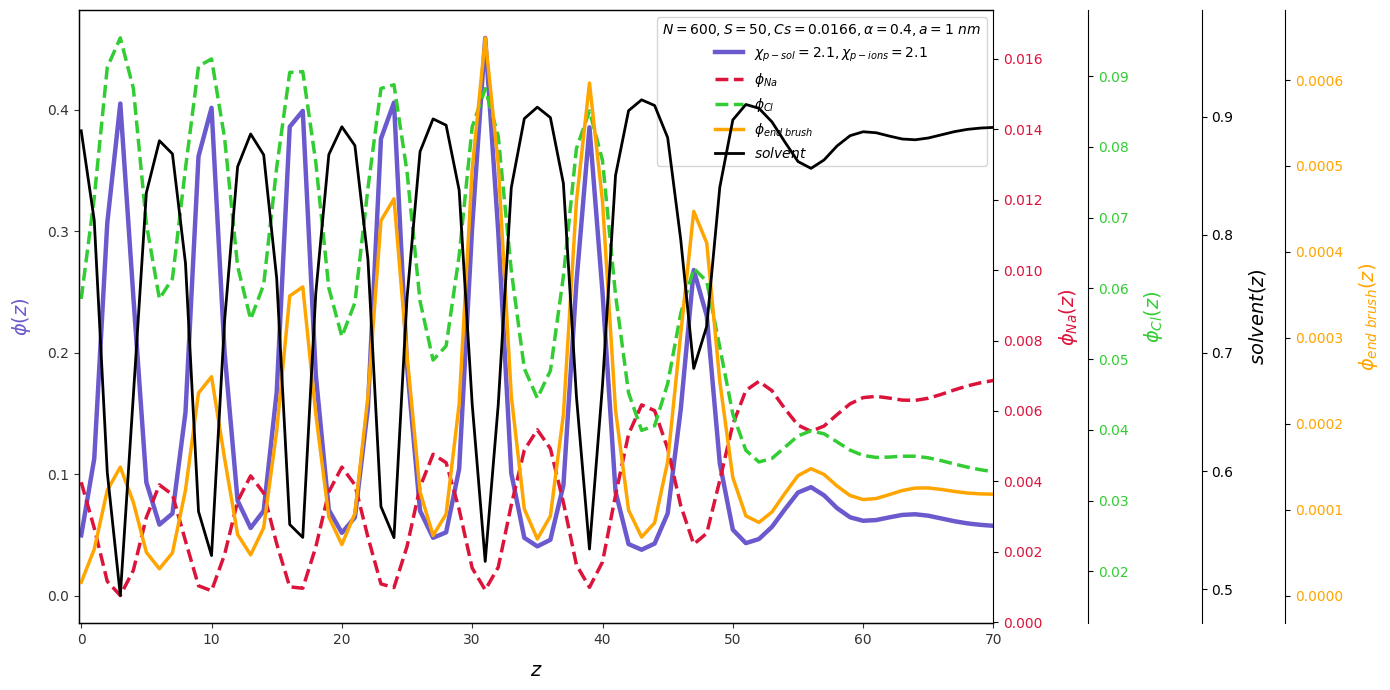

In [36]:
# Создаем фигуру
fig, ax1 = plt.subplots(figsize=(14, 7))  # Основная ось

# Первый график для phi_brush
line1, = ax1.plot(phi_brush, color='slateblue', label=f'$\\chi_{{p-sol}} = {chi}, \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, linestyle="-")
ax1.set_xlabel("$z$", fontsize=14, labelpad=10)
ax1.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10, color='slateblue')
ax1.tick_params(axis='y', labelcolor='slateblue')
ax1.set_xlim(-0.2, 70)

# Убираем верхнюю и правую границы
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_color("#333333")
ax1.spines["bottom"].set_color("#333333")
ax1.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Вторая ось y для phi_Na
ax2 = ax1.twinx()
line2, = ax2.plot(phi_Na, color='crimson', label='$\\phi_{Na}$', linewidth=2.5, linestyle="--")
ax2.set_ylabel("$\\phi_{Na}(z)$", fontsize=14, labelpad=10, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Третья ось y для phi_Cl
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 68))
line3, = ax3.plot(phi_Cl, color='limegreen', label='$\\phi_{Cl}$', linewidth=2.5, linestyle="--")
ax3.set_ylabel("$\\phi_{Cl}(z)$", fontsize=14, labelpad=10, color='limegreen')
ax3.tick_params(axis='y', labelcolor='limegreen')

# Четвертая ось y для концов
ax4 = ax1.twinx()
ax4.spines["right"].set_position(("outward", 210))
line4, = ax4.plot(phi_end_brush, color='orange', label='$\\phi_{end \\ brush}$', linewidth=2.5, linestyle="-")
ax4.set_ylabel("$\\phi_{end \\ brush}(z)$", fontsize=14, labelpad=10, color='orange')
ax4.tick_params(axis='y', labelcolor='orange')

# Пятая ось y для растворителя
ax5 = ax1.twinx()
ax5.spines["right"].set_position(("outward", 150))
line5, = ax5.plot(phi_W, color='black', label='$solvent$', linewidth=2, linestyle="-")
ax5.set_ylabel("$solvent(z)$", fontsize=14, labelpad=10, color='black')
ax5.tick_params(axis='y', labelcolor='black')

# Собираем все линии для общей легенды
lines = [line1, line2, line3, line4, line5]
labels = [line.get_label() for line in lines]

# Устанавливаем единую легенду в верхнем правом углу
ax1.legend(lines, labels, fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
           title_fontsize=10, loc="upper right", frameon=True)

# Убираем лишние отступы
plt.tight_layout()

plt.savefig('figure_1.pdf', dpi=300, bbox_inches='tight')
# Отображаем график
plt.show()



# Наложение плотности полимера и распределения заряда

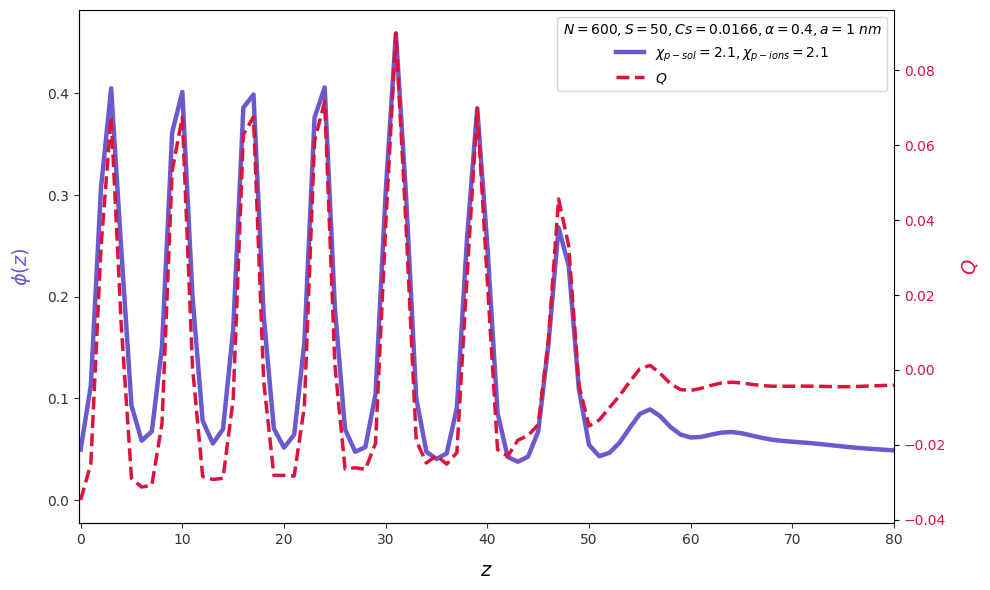

In [33]:
charge_dens = alpha * phi_brush + phi_Na - phi_Cl

fig, ax1 = plt.subplots(figsize=(10, 6))  # Создаем основное окно с первым графиком

# Первый график для phi_brush
line1, = ax1.plot(phi_brush, color='slateblue', label=f'$\\chi_{{p-sol}} = {chi}, \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, linestyle="-")
ax1.set_xlabel("$z$", fontsize=14, labelpad=10)
ax1.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10, color='slateblue')
ax1.tick_params(axis='y', labelcolor='slateblue')
ax1.set_xlim(-0.2, 80)

# Убираем верхнюю и правую границы
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_color("#333333")
ax1.spines["bottom"].set_color("#333333")
ax1.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Вторая ось y для Q
ax2 = ax1.twinx()  # Создаем вторую ось
line2, = ax2.plot(q, color='crimson', label='$Q$', linewidth=2.5, linestyle="--")
ax2.set_ylabel("$Q$", fontsize=14, labelpad=10, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Собираем все линии для общей легенды
lines = [line1, line2]
labels = [line.get_label() for line in lines]

# Устанавливаем единую легенду
ax1.legend(lines, labels, fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
           title_fontsize=10, loc="upper right", frameon=True)

# Убираем лишние отступы
plt.tight_layout()

plt.savefig('figure_3.pdf', dpi=300, bbox_inches='tight')
# Отображаем график
plt.show()



